In [97]:
import pandas as pd
df = pd.read_csv('F:/Intellihack_Weather_Forecasting/data/weather_data.csv')
df.head()  # Display the first few rows of the dataset

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


In [98]:
# Check for missing values
df.isnull().sum()

date                0
avg_temperature    15
humidity           15
avg_wind_speed     15
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64

In [99]:
# Step 3: Fill missing values
df["avg_temperature"] = df["avg_temperature"].fillna(df["avg_temperature"].mean())
df["humidity"] = df["humidity"].fillna(df["humidity"].median())



In [83]:
# Step 4: Verify missing values are filled
print("\nMissing values after filling:")
print(df.isnull().sum())



Missing values after filling:
date                0
avg_temperature     0
humidity            0
avg_wind_speed     15
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64


In [84]:
# Step 3: Fill missing values
df["avg_temperature"] = df["avg_temperature"].fillna(df["avg_temperature"].mean())
df["humidity"] = df["humidity"].fillna(df["humidity"].median())

In [85]:
# Step 4: Verify missing values are filled
print("\nMissing values after filling:")
print(df.isnull().sum())



Missing values after filling:
date                0
avg_temperature     0
humidity            0
avg_wind_speed     15
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64


In [86]:
df.describe()

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
count,311.000000,311.000000,296.000000,296.000000,311.000000
mean,25.983840,55.124267,7.556636,49.834827,1001.059119
std,6.635859,18.752991,5.344683,29.009459,28.835595
min,15.000000,30.000000,0.069480,0.321826,951.240404
25%,20.493383,35.686194,3.550354,24.530951,975.757545
50%,25.983840,56.759806,7.326421,50.725120,1001.938586
75%,31.858688,71.978037,11.050627,76.046506,1026.578884
max,35.000000,90.000000,56.636041,99.834751,1049.543752


In [87]:
df = df[df["humidity"] >= 0]

In [88]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])
df.head()


,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'avg_temperature'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'avg_wind_speed'}>],
       [<Axes: title={'center': 'cloud_cover'}>,
        <Axes: title={'center': 'pressure'}>]], dtype=object)

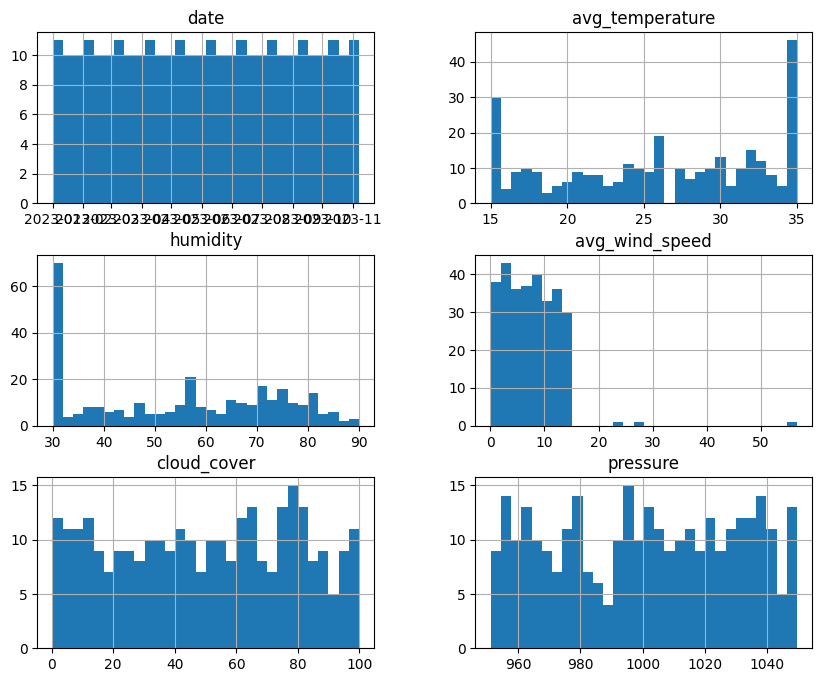

In [89]:
# Check the distribution of features
df.hist(bins=30, figsize=(10, 8))

<Axes: >

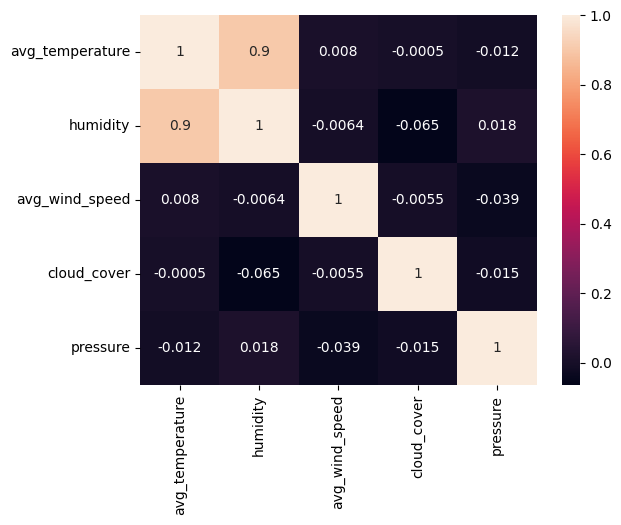

In [90]:
import seaborn as sns
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create the heatmap
sns.heatmap(numeric_df.corr(), annot=True)

<Axes: xlabel='date', ylabel='avg_temperature'>

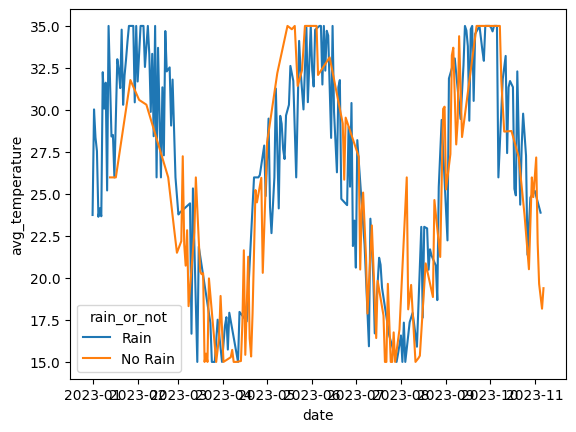

In [91]:
# Visualize trends over time
sns.lineplot(x='date', y='avg_temperature', hue='rain_or_not', data=df)

In [92]:
# Split the data
from sklearn.model_selection import train_test_split
X = df[['avg_temperature', 'humidity', 'avg_wind_speed']]
y = df['rain_or_not']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
# Create a pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('classifier', LogisticRegression())         # Train the model
])

# Fit the pipeline
pipeline.fit(X_train, y_train)
# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [94]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Train the model
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     No Rain       0.40      0.36      0.38        22
        Rain       0.67      0.71      0.69        41

    accuracy                           0.59        63
   macro avg       0.54      0.54      0.54        63
weighted avg       0.58      0.59      0.58        63



In [95]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}

# Initialize GridSearchCV with RandomForestClassifier
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print(grid_search.best_params_)

{'max_depth': 10, 'n_estimators': 100}


In [96]:
# Predict probability of rain
y_prob = model.predict_proba(X_test)[:, 1]
y_prob

array([0.61001213, 0.87503795, 0.55158645, 0.76244598, 0.9361133 ,
       0.26205657, 0.7303005 , 0.28042728, 0.78084577, 0.75533313,
       0.43722169, 0.98646961, 0.85425324, 0.48406345, 0.87460449,
       0.68951018, 0.88349921, 0.86769927, 0.88372849, 0.70809551,
       0.20104637, 0.53934437, 0.87002946, 0.25916451, 0.10151139,
       0.57143167, 0.27622043, 0.87785291, 0.87229484, 0.77427998,
       0.92483562, 0.72345841, 0.28437342, 0.96657159, 0.43613702,
       0.58637226, 0.61947184, 0.61687497, 0.23260792, 0.96560991,
       0.36480319, 0.96395727, 0.42124992, 0.63762247, 0.49084509,
       0.57805495, 0.7009979 , 0.9513622 , 0.79399693, 0.30051103,
       0.55158645, 0.53411015, 0.76306305, 0.25754389, 0.2939255 ,
       0.67356644, 0.91548654, 0.26589034, 0.85012416, 0.44168787,
       0.15691247, 0.96961524, 0.87460449])